# IMDB Project 3A EDA
-David Atkins

### Setup

In [146]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, MultipleLocator
import glob
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [147]:
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

['Data\\final_tmdb_data_2001.csv.gz', 'Data\\final_tmdb_data_2002.csv.gz']

In [148]:
# Use read_csv in a list comprehension and combine with concat to load all files
mdf = pd.concat([pd.read_csv(f) for f in tmdb_files] )
mdf.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,12.705,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,"[{'id': 85, 'logo_path': None, 'name': 'Konrad...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-25,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1234.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,An elite Federal force whose objective is to e...,3.773,/u0njmfXD3dXxQfeykBHBuFQOYqD.jpg,[],[],2001-01-01,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,With the future of the world hanging in the ba...,1.400,/z18E0lukzOtAALmfINSTCUU0Als.jpg,"[{'id': 71364, 'logo_path': None, 'name': 'Car...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-01,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",11.213,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13


### Exploritory Data Analysis

##### Data Viz Functions

In [149]:
def count_plot(data,col):
    ord = data[col].value_counts().index
    col_name = col.replace("_"," ")
    g = sns.countplot(data=data, x=col, order=ord)
    g.set(title=f'Count of {col_name}', xlabel=col_name, ylabel="Count");
    plt.xticks(rotation=90, ha='center')

In [169]:
# function
def plot_categorical_vs_target(df, x, y, dmin, dmax, ylbl, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, ):
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x]) 
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=(6,4))
  
    # Barplot 
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_yticklabels(ylbl)

  ax.set_ylim(dmin, dmax)  
  
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

##### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
- *Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.*

In [151]:
# Setting financial information 
df = mdf
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2646 entries, 0 to 1292
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2646 non-null   object 
 1   adult                  2644 non-null   float64
 2   backdrop_path          1517 non-null   object 
 3   belongs_to_collection  215 non-null    object 
 4   budget                 2644 non-null   float64
 5   genres                 2644 non-null   object 
 6   homepage               213 non-null    object 
 7   id                     2644 non-null   float64
 8   original_language      2644 non-null   object 
 9   original_title         2644 non-null   object 
 10  overview               2586 non-null   object 
 11  popularity             2644 non-null   float64
 12  poster_path            2405 non-null   object 
 13  production_companies   2644 non-null   object 
 14  production_countries   2644 non-null   object 
 15  rele

In [152]:
drop_filter = df.query('budget <= 0 & revenue <= 0 ')
drop_filter.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,An elite Federal force whose objective is to e...,3.773,/u0njmfXD3dXxQfeykBHBuFQOYqD.jpg,[],[],2001-01-01,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,With the future of the world hanging in the ba...,1.400,/z18E0lukzOtAALmfINSTCUU0Als.jpg,"[{'id': 71364, 'logo_path': None, 'name': 'Car...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-01,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.5,2.0,PG
7,tt0120166,0.0,/havCE85OV7FUMWzqAZ9x31XRRCA.jpg,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",NaN,50944.0,en,The Sorcerer's Apprentice,"Every hundred years, the evil sorceress Morgan...",5.979,/x1ZDLPgXlPvULLTlskjesrOZ9nP.jpg,"[{'id': 26857, 'logo_path': None, 'name': 'Pea...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2002-04-12,0.0,86.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,The Sorcerer's Apprentice,0.0,4.6,11.0,NR


In [153]:
df.drop(drop_filter.index, inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 1151
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                257 non-null    object 
 1   adult                  255 non-null    float64
 2   backdrop_path          215 non-null    object 
 3   belongs_to_collection  42 non-null     object 
 4   budget                 255 non-null    float64
 5   genres                 255 non-null    object 
 6   homepage               44 non-null     object 
 7   id                     255 non-null    float64
 8   original_language      255 non-null    object 
 9   original_title         255 non-null    object 
 10  overview               255 non-null    object 
 11  popularity             255 non-null    float64
 12  poster_path            247 non-null    object 
 13  production_companies   255 non-null    object 
 14  production_countries   255 non-null    object 
 15  relea

In [155]:
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,"A young woman is catapulted into pop stardom, ...",11.213,/b8gKsXB6d60SC2HKUcAAzTacn0S.jpg,"[{'id': 89627, 'logo_path': None, 'name': 'Gli...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-09-21,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
5,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,Trevor Blackburn is accused of murdering his g...,4.178,/b0p8CjMLWc7B1nnIfFQ2uY3HLe0.jpg,"[{'id': 3260, 'logo_path': None, 'name': 'Tse ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-03-30,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.194,31.0,R


- There are 257 movies with entries greater than 0 for either budget or revenue
- I have removed the movies with 0 in both

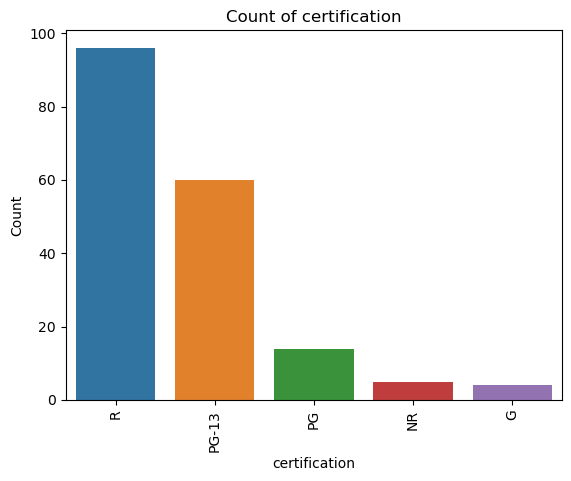

In [156]:
count_plot(df,'certification')

##### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        96
PG-13    60
PG       14
NR        5
G         4
Name: certification, dtype: int64

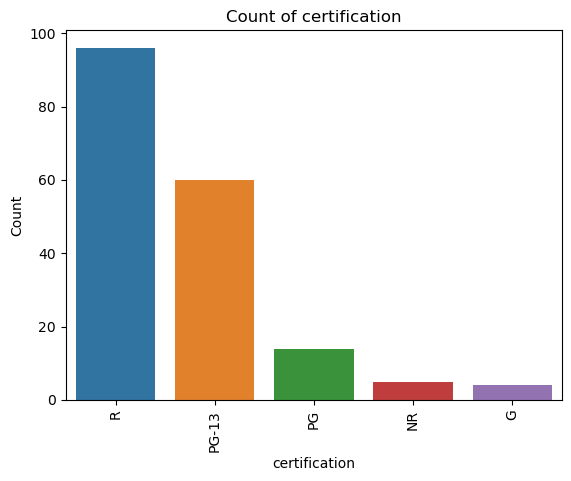

In [157]:
count_plot(df,'certification')
df['certification'].value_counts()

##### What is the average revenue per certification category?


In [171]:
# plt.ylim(10, 40)
dfmin = df['revenue'].min()
dfmax = df['revenue'].max()
dfmax

976475520.0

In [162]:
ylbl = ['$0', '$200,000,000', '$400,000,000', '$600,000,000', '$800,000,000', '$1,000,000,000']

In [163]:
df['revenue'] = df['revenue'].astype("float32")
df.groupby('certification')['revenue'].mean()

certification
G         91031024.0
NR         6814726.5
PG       261236176.0
PG-13    110996792.0
R         33467706.0
Name: revenue, dtype: float32

C:\Users\gondr\AppData\Local\Temp\ipykernel_41172\1963851188.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylbl)


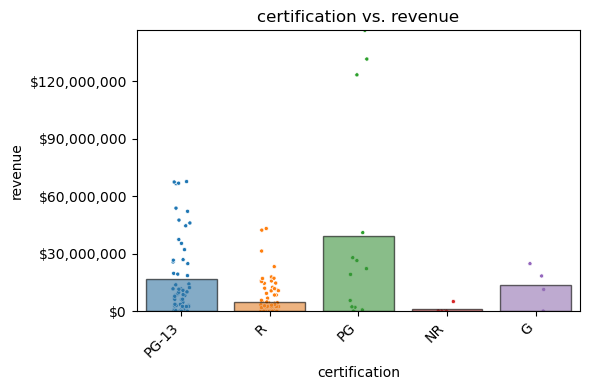

In [172]:
fig, ax = plot_categorical_vs_target(df, x='certification', y='revenue', fillna=False, dmin=dfmin, dmax=dfmax, ylbl=ylbl)

##### What is the average budget per certification category?

In [173]:
# plt.ylim(10, 40)
dfmin = df['budget'].min()
dfmax = df['budget'].max()
dfmax

140000000.0

In [175]:
ylbl = ['$0', '$20,000,000', '$40,000,000', '$60,000,000', '$80,000,000', '$100,000,000','$120,000,000','$140,000,000']

In [167]:
df['budget'] = df['budget'].astype("float32")
df.groupby('certification')['budget'].mean()

certification
G        34250000.0
NR        1489000.0
PG       64035712.0
PG-13    43115792.0
R        22905312.0
Name: budget, dtype: float32

C:\Users\gondr\AppData\Local\Temp\ipykernel_41172\1963851188.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylbl)


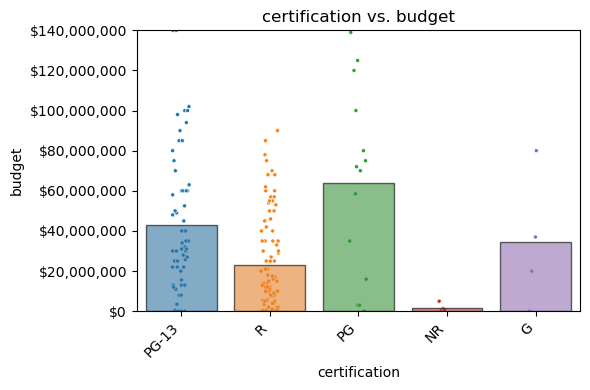

In [176]:
fig, ax = plot_categorical_vs_target(df, x='certification', y='budget', fillna=False, dmin=dfmin, dmax=dfmax, ylbl=ylbl)

##### Saving Combined API Data

In [ ]:
# Save file path to folder with new file name at the end
fname_out = "/Data/tmdb_results_combined.csv.gz"
mdf.to_csv(fname_out, index=False)